<a href="https://colab.research.google.com/github/FabioCerqueiraGit/DataSciencePython/blob/main/DataSciencePython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Vendas com metodologia Data Science
Python com bibliotecas:
Pandas, Matplotlib e Seaborn
www.fabiocerqueira.com.br
+55(31)98457-3832

# Configurando o ambiente no Google Colab

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carregando os dados

In [58]:
# URLs dos arquivos no GitHub
url_metas = 'https://github.com/FabioCerqueiraGit/DadosVendasDescaracterizados/blob/main/Metas.xlsx?raw=true'
url_produtos = 'https://github.com/FabioCerqueiraGit/DadosVendasDescaracterizados/blob/main/Produtos.xlsx?raw=true'
url_vendas = 'https://github.com/FabioCerqueiraGit/DadosVendasDescaracterizados/blob/main/Vendas.xlsx?raw=true'
url_vendedores = 'https://github.com/FabioCerqueiraGit/DadosVendasDescaracterizados/blob/main/Vendedores.xlsx?raw=true'

# Carregando os dados
metas = pd.read_excel(url_metas)
produtos = pd.read_excel(url_produtos)
vendas = pd.read_excel(url_vendas)
vendedores = pd.read_excel(url_vendedores)


# Verificando os dados carregados

In [59]:
# Verificando os nomes das colunas
print("Metas columns:", metas.columns)
print('')
print("Produtos columns:", produtos.columns)
print('')
print("Vendas columns:", vendas.columns)
print('')
print("Vendedores columns:", vendedores.columns)
print('')


Metas columns: Index(['Mês', 'Ano', 'Vendedor', 'Meta Faturamento', 'Meta Margem Bruta',
       'Meta Notas Emitidas'],
      dtype='object')

Produtos columns: Index(['Cod Produto', 'Grupo Produto', 'Linha Produto', 'Fornecedor',
       'CustoUnitario'],
      dtype='object')

Vendas columns: Index(['Data', 'NFe', 'cdProduto', 'cdVendedor', 'Vendedor', 'Equipe Vendas',
       'QtdItens', 'PrecoUnitario'],
      dtype='object')

Vendedores columns: Index(['cdVendedor', 'Vendedor', 'Equipe Vendas', 'Foto'], dtype='object')



# Colunas auxiliares de DATA
Esse é um costume meu em todos os softwares de Análise e Ciência de Dados. Eu sempre deixo essa opção de informação duisponível para facilitar os próximos passos da análise.

In [61]:
# Mapeamento dos meses em português para números
meses = {
    "janeiro": 1, "fevereiro": 2, "março": 3, "abril": 4, "maio": 5, "junho": 6,
    "julho": 7, "agosto": 8, "setembro": 9, "outubro": 10, "novembro": 11, "dezembro": 12
}

# Criando a coluna MesNumero
metas['MesNumero'] = metas['Mês'].str.lower().map(meses)
metas['Trimestre'] = metas['MesNumero'].apply(lambda x: (x - 1) // 3 + 1)
metas['Semestre'] = metas['MesNumero'].apply(lambda x: (x - 1) // 6 + 1)

# Explorando os dados

In [62]:
print('--------------------------------------')
print('Visualização parcial dos dados de META')
print('--------------------------------------')
print(metas.head())
print('------------------------------------------')
print('Visualização parcial dos dados de PRODUTOS')
print('------------------------------------------')
print(produtos.head())
print('----------------------------------------')
print('Visualização parcial dos dados de VENDAS')
print('----------------------------------------')
print(vendas.head())
print('--------------------------------------------')
print('Visualização parcial dos dados de VENDEDORES')
print('--------------------------------------------')
print(vendedores.head())


--------------------------------------
Visualização parcial dos dados de META
--------------------------------------
         Mês   Ano              Vendedor  Meta Faturamento  Meta Margem Bruta  \
0    janeiro  2019  102 - Gustavo Barros         85.425000            93.2960   
1  fevereiro  2019  102 - Gustavo Barros        572.900000           306.2304   
2      março  2019  102 - Gustavo Barros         40.233333           138.1800   
3      abril  2019  102 - Gustavo Barros         97.466667            59.2704   
4       maio  2019  102 - Gustavo Barros       4643.975000          6512.6880   

   Meta Notas Emitidas  MesNumero  Trimestre  Semestre  
0                 11.7          1          1         1  
1                 13.0          2          1         1  
2                  2.6          3          1         1  
3                  0.0          4          2         1  
4                 65.0          5          2         1  
------------------------------------------
Visualizaçã

# Tratando os problemas identificado nos dados
Problema 01: A coluna "Cod Produto" contem string + int e pode ocasionar problemas na consolidação dos dados.

In [63]:
# Verificando se a coluna 'Cod Produto' contém o prefixo 'Prod '
if produtos['Cod Produto'].str.contains('Prod ').any():
    # Removendo o prefixo "Prod " e convertendo para inteiro na coluna "Cod Produto"
    produtos['Cod Produto'] = produtos['Cod Produto'].str.replace('Prod ', '').astype(int)
    print("Prefixo 'Prod ' removido e coluna convertida para inteiro.")
else:
    print("Nenhum prefixo 'Prod ' encontrado na coluna 'Cod Produto'.")

# Verificando a correção
print(produtos.head())

Prefixo 'Prod ' removido e coluna convertida para inteiro.
   Cod Produto Grupo Produto Linha Produto   Fornecedor  CustoUnitario
0         2096      Açúcares     Alimentos  King Coffee           2.11
1         2097      Açúcares     Alimentos  King Coffee           2.11
2          462      Açúcares     Alimentos  King Coffee           1.87
3          467      Açúcares     Alimentos  King Coffee           1.85
4          691      Açúcares     Alimentos  King Coffee           2.74


Problema 02: Na tabela Meta temos a coluna vendedor e dentro as informações estão com o código do vendedor + " - " + nome do vendedor por exemplo "102 - Gustavo Barros".

In [64]:
# Dividindo a coluna 'vendedor' em 'cdVendedor' e 'vendedor'
metas['cdVendedor'] = metas['Vendedor'].str.extract(r'(\d+)', expand=False).astype(int)
metas['Vendedor'] = metas['Vendedor'].str.replace(r'\d+ - ', '', regex=True)

# Verificando a correção
print(metas.head())

         Mês   Ano        Vendedor  Meta Faturamento  Meta Margem Bruta  \
0    janeiro  2019  Gustavo Barros         85.425000            93.2960   
1  fevereiro  2019  Gustavo Barros        572.900000           306.2304   
2      março  2019  Gustavo Barros         40.233333           138.1800   
3      abril  2019  Gustavo Barros         97.466667            59.2704   
4       maio  2019  Gustavo Barros       4643.975000          6512.6880   

   Meta Notas Emitidas  MesNumero  Trimestre  Semestre  cdVendedor  
0                 11.7          1          1         1         102  
1                 13.0          2          1         1         102  
2                  2.6          3          1         1         102  
3                  0.0          4          2         1         102  
4                 65.0          5          2         1         102  


# Análise descritiva

In [74]:
# Análise descritiva das metas
print('----------------------------')
print('Análise descritiva das metas')
print('----------------------------')
print(metas.describe())

# Análise descritiva dos produtos
print('-------------------------------')
print('Análise descritiva dos produtos')
print('-------------------------------')
print(produtos.describe())

# Análise descritiva das vendas
print('-----------------------------')
print('Análise descritiva das vendas')
print('-----------------------------')
print(vendas.describe())

# Análise descritiva dos vendedores
print('---------------------------------')
print('Análise descritiva dos vendedores')
print('---------------------------------')
print(vendedores.describe())


----------------------------
Análise descritiva das metas
----------------------------
               Ano  Meta Faturamento  Meta Margem Bruta  Meta Notas Emitidas  \
count    24.000000         24.000000          24.000000            24.000000   
mean   2019.500000      49282.414444       38332.788200           522.437500   
std       0.510754      60920.099391       45365.385414           726.036078   
min    2019.000000         40.233333          39.984000             0.000000   
25%    2019.000000        649.081250         622.515600            12.675000   
50%    2019.500000      38403.340000       21304.808000           207.350000   
75%    2020.000000      75868.981250       69819.472800           747.500000   
max    2020.000000     247741.566667      146160.806400          2819.700000   

       MesNumero  Trimestre   Semestre  cdVendedor  
count  24.000000   24.00000  24.000000        24.0  
mean    6.500000    2.50000   1.500000       102.0  
std     3.526299    1.14208   0.5

# Analisando a performance de vendas

In [75]:
# Unindo vendas com produtos
vendas_produtos = vendas.merge(produtos, left_on='cdProduto', right_on='Cod Produto')

# Unindo vendas_produtos com vendedores
vendas_completas = vendas_produtos.merge(vendedores, left_on='cdVendedor', right_on='cdVendedor')

# Calculando o valor total das vendas
vendas_completas['ValorTotalVenda'] = vendas_completas['PrecoUnitario'] * vendas_completas['QtdItens']

# Exibindo a tabela completa
print(vendas_completas.head())

         Data       NFe  cdProduto  cdVendedor        Vendedor_x  \
0  01/01/2019   1793150       2255         144  Felipe Goncalves   
1  01/01/2020   8965750       2255         144  Felipe Goncalves   
2  01/03/2020   9288955       2255         144  Felipe Goncalves   
3  01/03/2020  14870288       2255         144  Felipe Goncalves   
4  01/04/2019   1898114       2255         144  Felipe Goncalves   

  Equipe Vendas_x  QtdItens  PrecoUnitario  Cod Produto Grupo Produto  \
0          Online        24           0.94         2255     Fermentos   
1          Online        24           0.90         2255     Fermentos   
2          Online        24           0.71         2255     Fermentos   
3          Online        24           0.65         2255     Fermentos   
4          Online        48           0.90         2255     Fermentos   

  Linha Produto          Fornecedor  CustoUnitario        Vendedor_y  \
0     Alimentos  Moinho Dois Irmãos           0.21  Felipe Goncalves   
1     Al

# Visualização dos dados
Vendas por Vendedor

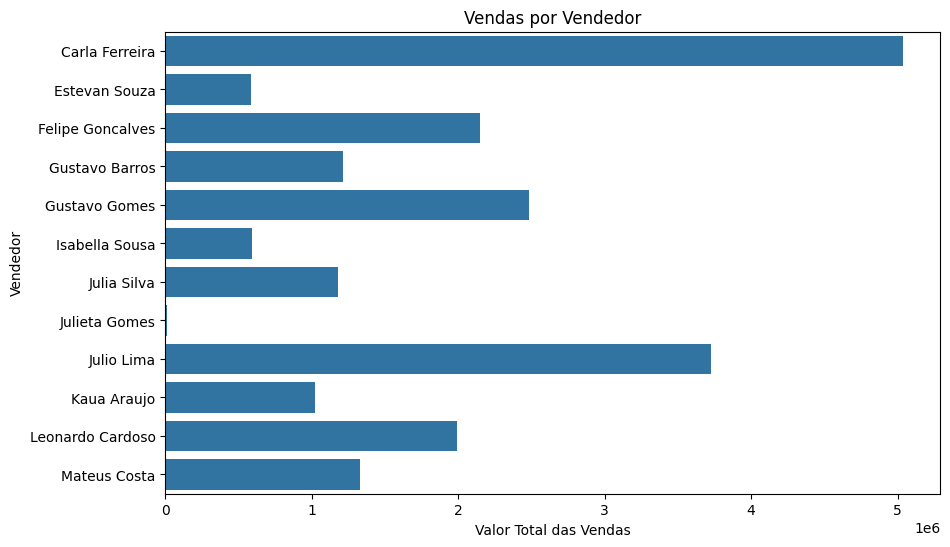

In [67]:
# Vendas por Vendedor
vendas_por_vendedor = vendas_completas.groupby('Vendedor_x')['ValorTotalVenda'].sum().reset_index()
vendas_por_vendedor = vendas_por_vendedor.rename(columns={'Vendedor_x': 'Vendedor', 'ValorTotalVenda': 'ValorTotalVendas'})
plt.figure(figsize=(10, 6))
sns.barplot(x='ValorTotalVendas', y='Vendedor', data=vendas_por_vendedor)
plt.title('Vendas por Vendedor')
plt.xlabel('Valor Total das Vendas')
plt.ylabel('Vendedor')
plt.show()

Vendas por Produto

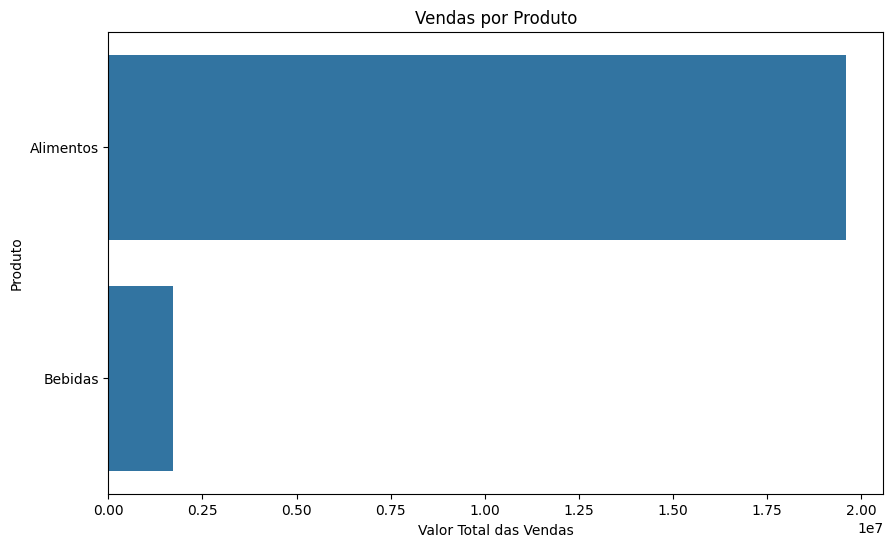

In [56]:
# Vendas por Produto
vendas_por_produto = vendas_completas.groupby('Linha Produto')['ValorTotalVenda'].sum().reset_index()
vendas_por_produto = vendas_por_produto.rename(columns={'Linha Produto': 'Produto', 'ValorTotalVenda': 'ValorTotalVendas'})
plt.figure(figsize=(10, 6))
sns.barplot(x='ValorTotalVendas', y='Produto', data=vendas_por_produto)
plt.title('Vendas por Produto')
plt.xlabel('Valor Total das Vendas')
plt.ylabel('Produto')
plt.show()

Metas vs. Vendas

In [76]:
print('--------------------------------------')
print('Visualização parcial dos dados de META')
print('--------------------------------------')
print(metas.head())
print('--------------------------------------------------')
print('Visualização parcial dos dados de vendas_completas')
print('--------------------------------------------------')
print(vendas_completas.head())

--------------------------------------
Visualização parcial dos dados de META
--------------------------------------
         Mês   Ano        Vendedor  Meta Faturamento  Meta Margem Bruta  \
0    janeiro  2019  Gustavo Barros         85.425000            93.2960   
1  fevereiro  2019  Gustavo Barros        572.900000           306.2304   
2      março  2019  Gustavo Barros         40.233333           138.1800   
3      abril  2019  Gustavo Barros         97.466667            59.2704   
4       maio  2019  Gustavo Barros       4643.975000          6512.6880   

   Meta Notas Emitidas  MesNumero  Trimestre  Semestre  cdVendedor  
0                 11.7          1          1         1         102  
1                 13.0          2          1         1         102  
2                  2.6          3          1         1         102  
3                  0.0          4          2         1         102  
4                 65.0          5          2         1         102  
------------------

In [93]:
# Metas vs. Vendas
vendas_metas = vendas_completas.merge(metas, left_on=['cdVendedor'], right_on=['cdVendedor'])
vendas_metas['DifMeta'] = vendas_metas['ValorTotalVenda'] - vendas_metas['Meta Faturamento']

# Filtrando os dados para Alimentos e Bebidas
vendas_metas_alimentos = vendas_metas[vendas_metas['Linha Produto'] == 'Alimentos']
vendas_metas_bebidas = vendas_metas[vendas_metas['Linha Produto'] == 'Bebidas']

print(vendas_metas_alimentos.head())
print()
print(vendas_metas_bebidas.head())

         Data       NFe  cdProduto  cdVendedor      Vendedor_x  \
0  01/08/2020  18182988       2255         102  Gustavo Barros   
1  01/08/2020  18182988       2255         102  Gustavo Barros   
2  01/08/2020  18182988       2255         102  Gustavo Barros   
3  01/08/2020  18182988       2255         102  Gustavo Barros   
4  01/08/2020  18182988       2255         102  Gustavo Barros   

  Equipe Vendas_x  QtdItens  PrecoUnitario  Cod Produto Grupo Produto  ...  \
0          Varejo        24           0.82         2255     Fermentos  ...   
1          Varejo        24           0.82         2255     Fermentos  ...   
2          Varejo        24           0.82         2255     Fermentos  ...   
3          Varejo        24           0.82         2255     Fermentos  ...   
4          Varejo        24           0.82         2255     Fermentos  ...   

         Mês   Ano        Vendedor Meta Faturamento Meta Margem Bruta  \
0    janeiro  2019  Gustavo Barros        85.425000          